In [197]:
#!/usr/bin/env python3
#_*_utf-8_*_
from scipy import stats  
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy.stats as stats

all_files = glob.glob('Parsed*')
years = list(range(1975, 2017))
years.remove(2012)

times = {}

def get_sec(t):

    h, m, s = t.split(':')
    seconds = 3600*int(h)+60*int(m)+int(s)
    return seconds

for y in years:
    
    f_open = open('ParsedNYC{}.txt'.format(y), 'r')
    
    times[y] = {'m':[], 'f':[], 'a':[], 'weather':[]}

    for r in f_open:
        row = r.split(',')
        try:
            h, m, s = row[-1].strip('\n').split(':')
            times[y]['a'].append(get_sec(row[-1].strip('\n')))
            if row[1] == 'M':
                times[y]['m'].append(get_sec(row[-1].strip('\n')))
            else:
                times[y]['f'].append(get_sec(row[-1].strip('\n')))
        except ValueError:
            continue
    print(y, len(times[y]['a']))

1975 102
1976 115
1977 137
1978 184
1979 204
1980 224
1981 232
1982 234
1983 14499
1984 6278
1985 15893
1986 19731
1987 3800
1988 22403
1989 4397
1990 23766
1991 25794
1992 27867
1993 26608
1994 29750
1995 7099
1996 28151
1997 30422
1998 31536
1999 31763
2000 29283
2001 23633
2002 31805
2003 34675
2004 36554
2005 36861
2006 38030
2007 38725
2008 38222
2009 43530
2010 44681
2011 47327
2013 50062
2014 50433
2015 49828
2016 48467


In [179]:
# start the formating for potential plots
thirty_min = 30*60
time_ticks = np.linspace(7200, 34200, 100)
ticks_axes = np.arange(7200, 34200, thirty_min)
tick_lab = []
for t in ticks_axes:
    m, s = divmod(t, 60)
    h, m = divmod(m, 60)
    #print("%d:%02d:%02d" % (h, m, s))
    tick_lab.append("%d:%02d:%02d" % (h, m, s))
                    
import datetime as dt
bins = np.linspace(7200, 34200, 100)
years = np.arange(2010, 2017)

In [180]:
# read in marathon dates
file_d = glob.glob('*Dates.txt')
dates_file = open(file_d[0], 'r')
dates = []
for d in dates_file:
    d, m, y = d.split('-') 
    dates.append('-'.join([y.strip('\n'),m,d]))

In [181]:
# get weather data
file_w = glob.glob('*Weather.csv')
weather_data = []
weather_file = open(file_w[0], 'r')
for w in weather_file:
    w_row = w.split(',')
    w_row = [r.strip('"') for r in w_row]
    w_date = w_row[3]
    for d in dates:
        if d == w_date:
            weather_data.append(w_row)

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    22.2       14.4      
year 1975 cdf:  0.0


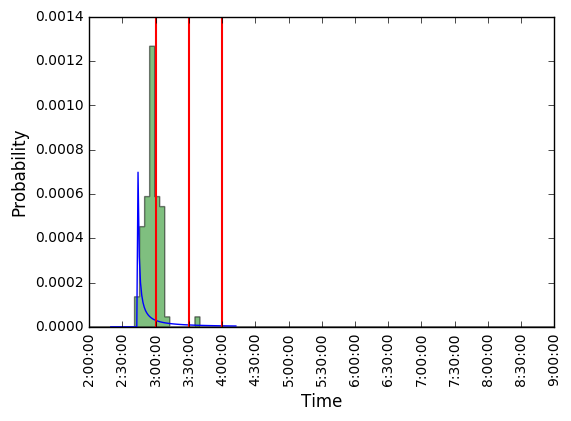

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    5.1        -9999.9    12.2       7.8       
year 1976 cdf:  0.0


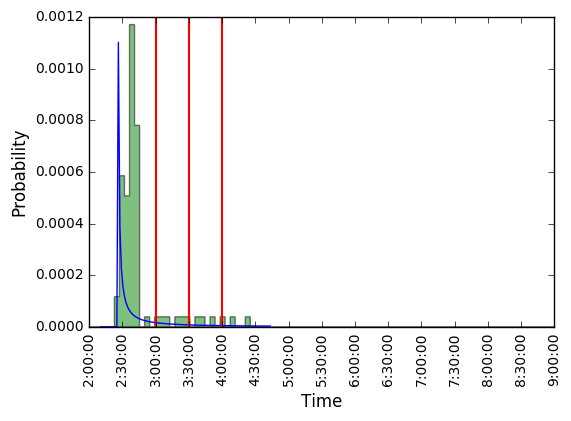

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    13.9       4.4       
year 1977 cdf:  0.0


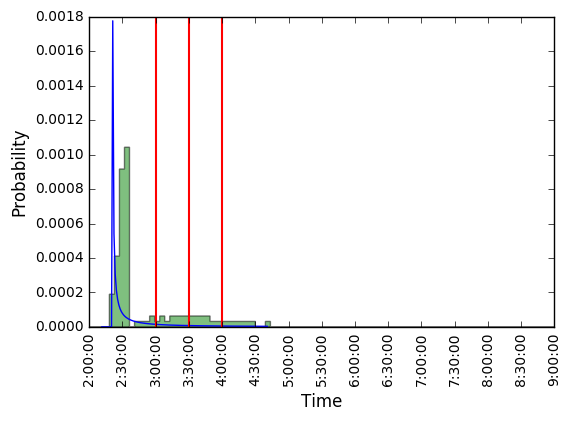

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    21.1       11.7      
year 1978 cdf:  0.0


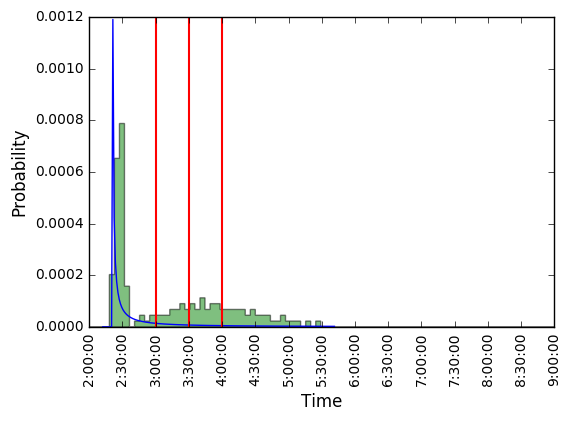

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    21.7       14.4      
year 1979 cdf:  0.0


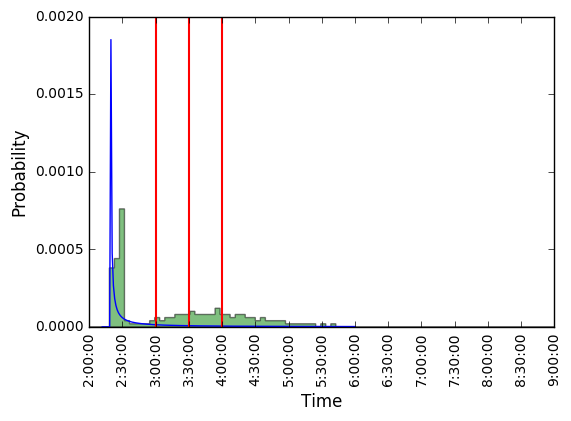

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    10.6       6.7       
year 1980 cdf:  0.0


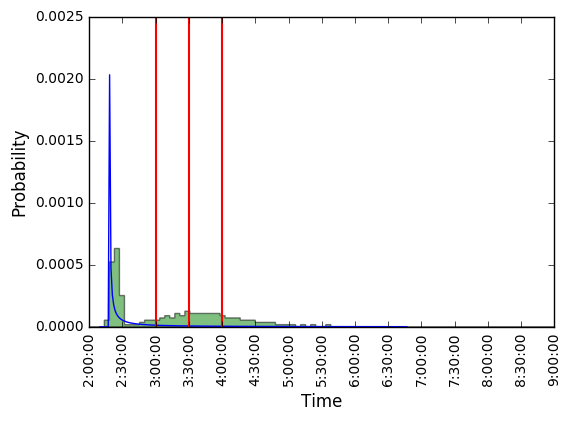

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    7.9        -9999.9    12.8       3.9       
year 1981 cdf:  0.0


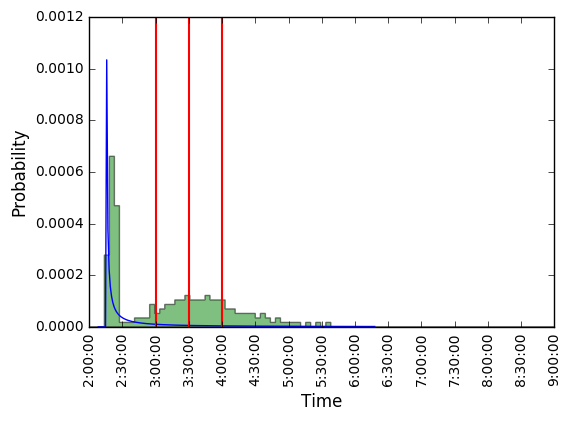

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    9.9        -9999.9    18.3       3.3       
year 1982 cdf:  0.0


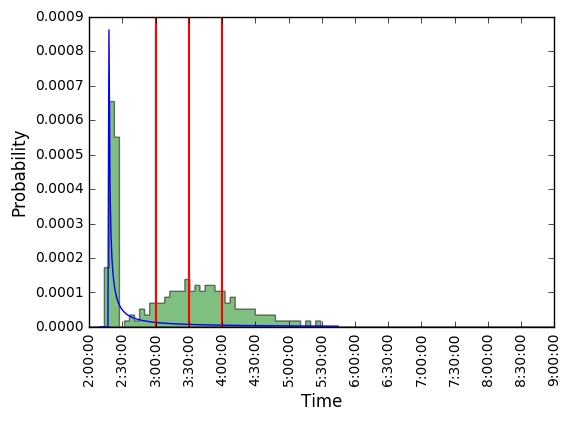

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
-9999.9    0.0        -9999.9    17.2       11.1      
year 1983 cdf:  0.0


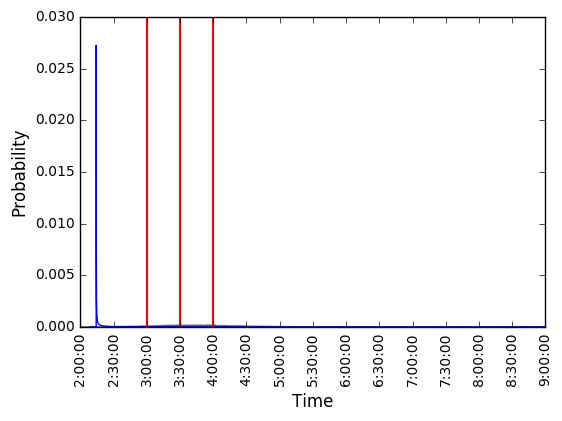

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
3.5        3.0        -9999.9    23.9       17.2      
year 1984 cdf:  0.0


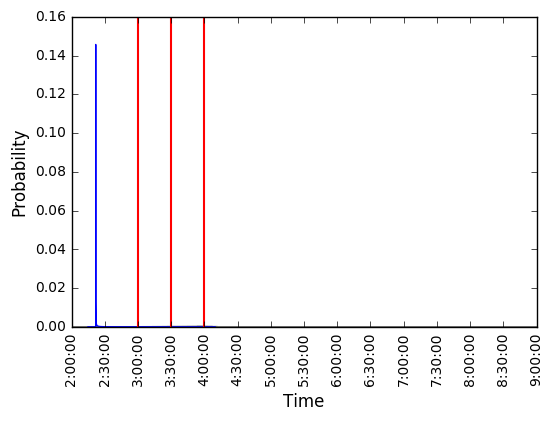

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
5.5        0.0        -9999.9    20.0       11.1      
year 1985 cdf:  0.000330002690008


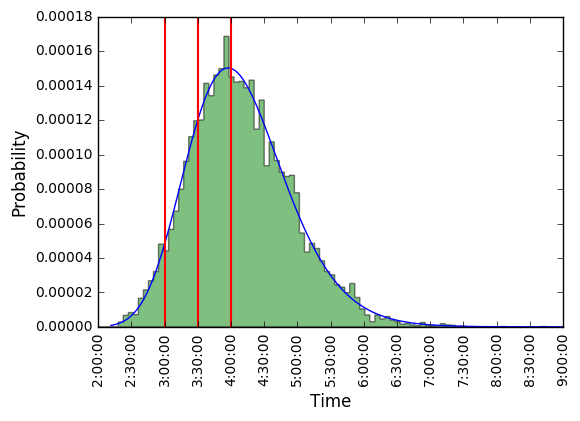

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
5.7        2.3        -9999.9    17.2       6.7       
year 1986 cdf:  0.000106878498802


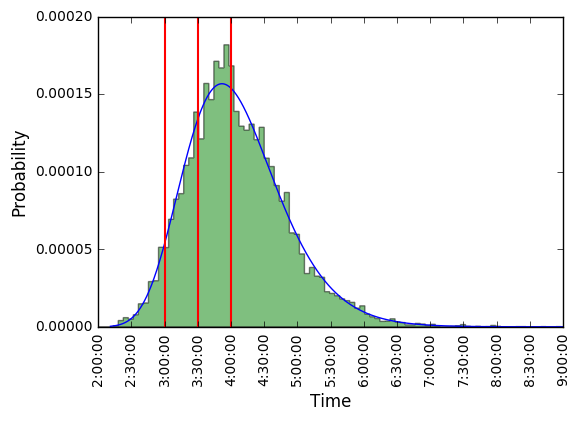

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
2.5        0.0        -9999.9    15.6       5.0       
year 1987 cdf:  0.0


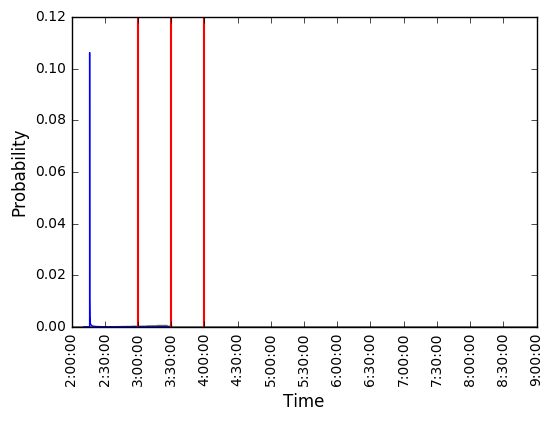

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
6.4        0.0        -9999.9    17.8       11.1      
year 1988 cdf:  0.0


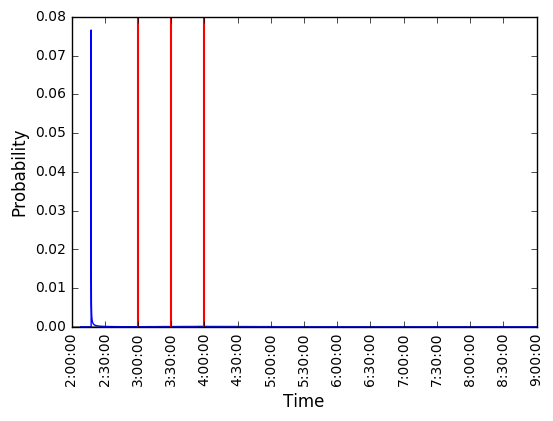

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
6.6        0.0        -9999.9    17.2       11.1      
year 1989 cdf:  8.08921502322e-06


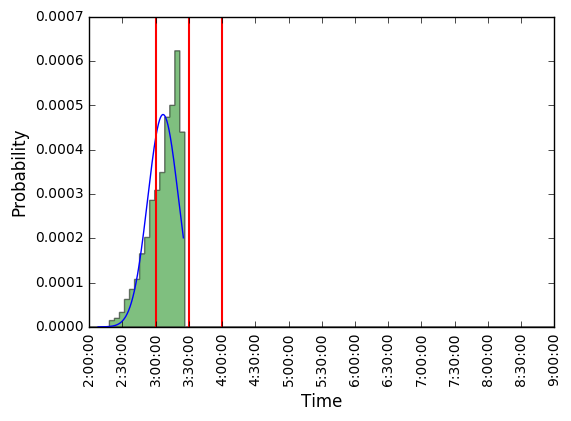

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
3.6        0.0        -9999.9    23.9       11.7      
year 1990 cdf:  0.0


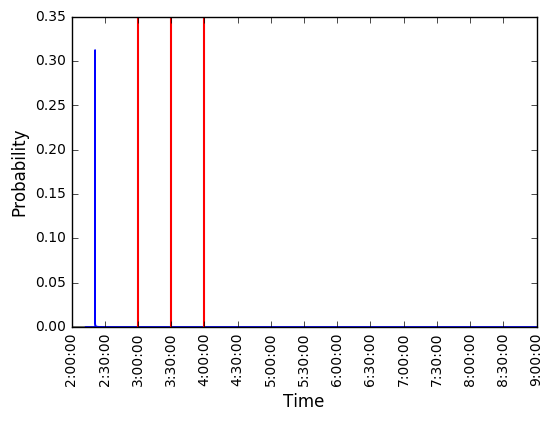

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
5.5        0.0        -9999.9    14.4       8.3       
year 1991 cdf:  4.01342294381e-05


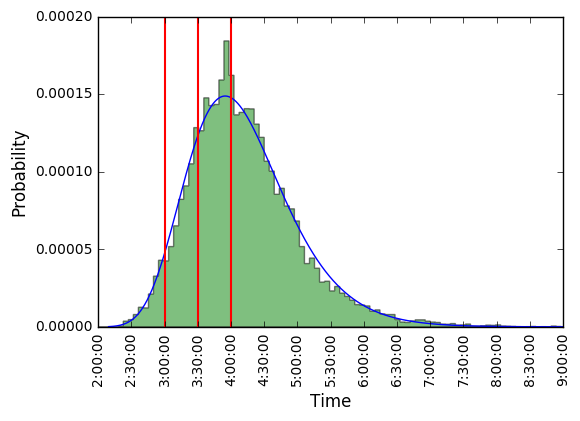

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.4        0.0        -9999.9    10.0       4.4       
year 1992 cdf:  1.49592608587e-05


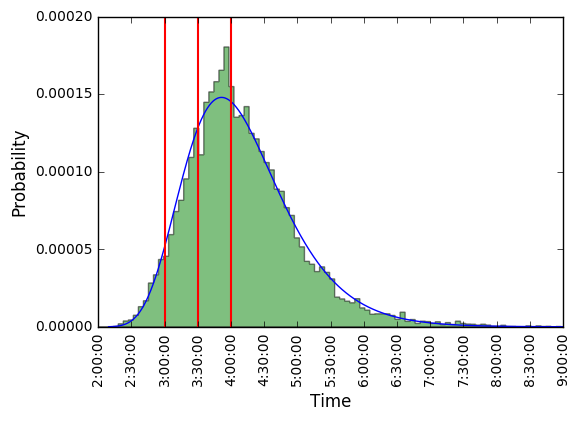

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
3.2        0.0        -9999.9    17.2       10.6      
year 1993 cdf:  0.0


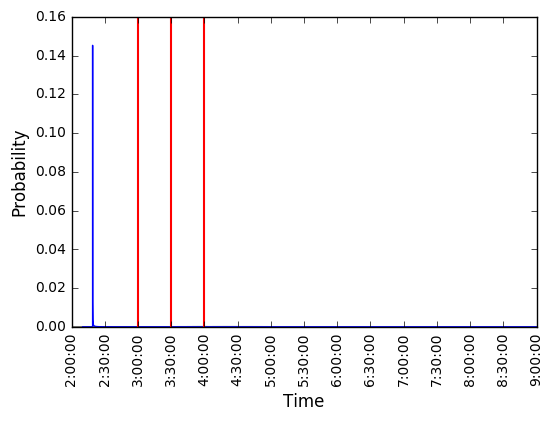

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
3.4        0.0        -9999.9    20.6       11.1      
year 1994 cdf:  1.2582032033e-05


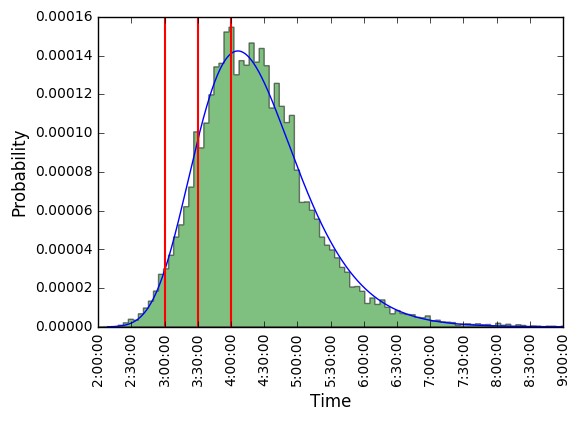

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
7.9        14.7       -9999.9    16.7       1.7       
year 1995 cdf:  7.14755982002e-06


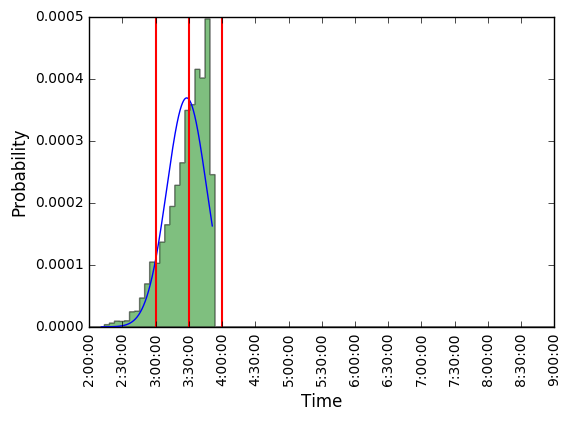

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
3.0        0.0        -9999.9    13.9       5.6       
year 1996 cdf:  0.0


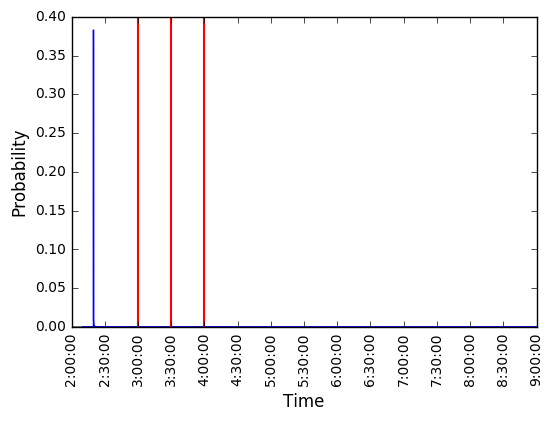

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
6.7        2.5        -9999.9    17.8       9.4       
year 1997 cdf:  4.402483718e-06


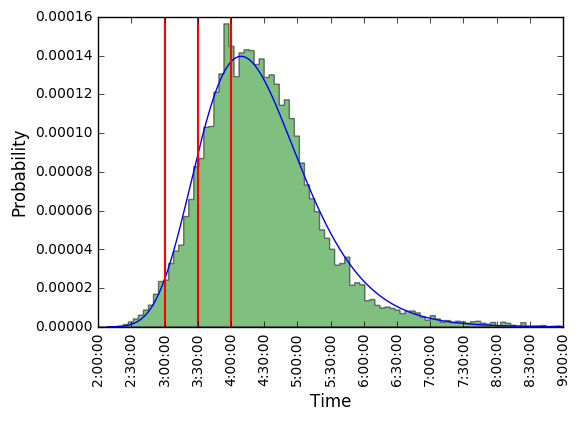

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.3        0.0        7.8        11.1       3.9       
year 1998 cdf:  0.0


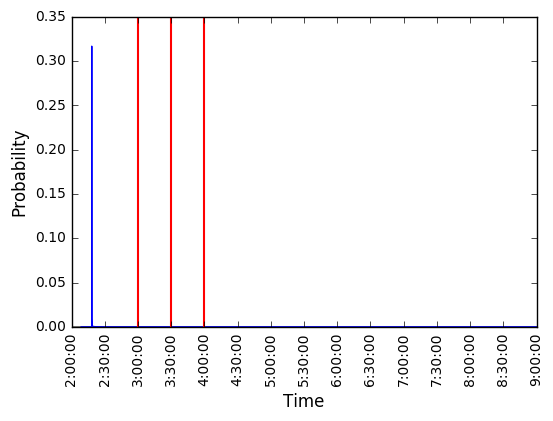

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
7.8        0.0        7.2        11.1       3.3       
year 1999 cdf:  1.13073230007e-05


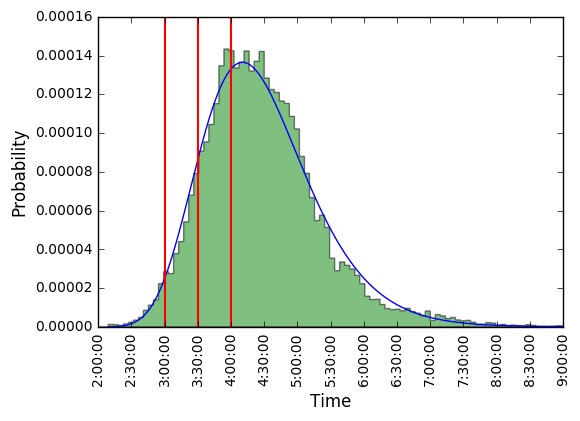

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
8.2        0.0        9.4        12.2       6.7       
year 2000 cdf:  2.24588574288e-05


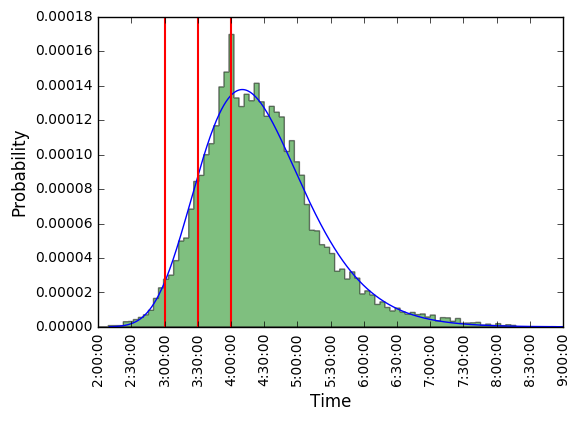

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.6        0.0        12.2       15.6       8.3       
year 2001 cdf:  7.50129398185e-05


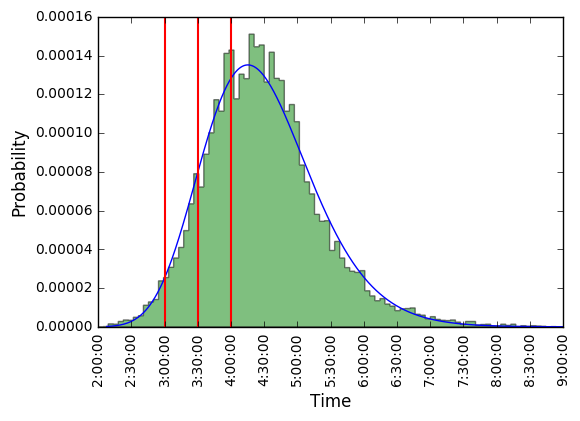

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.3        0.0        5.6        8.3        2.8       
year 2002 cdf:  1.19598998806e-05


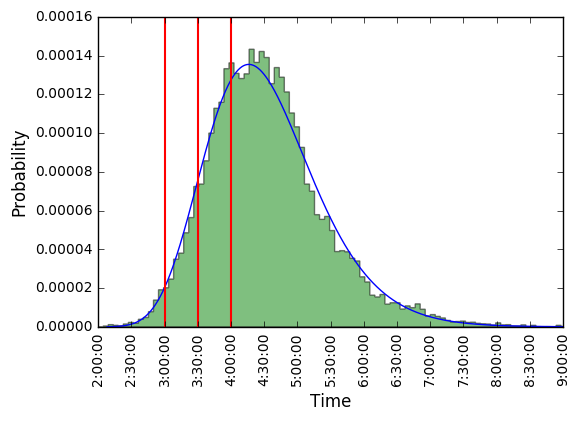

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
2.5        0.0        16.1       18.3       13.3      
pdf did not converge, retrying with new parameter set
year 2003 cdf:  2.83877681346e-05


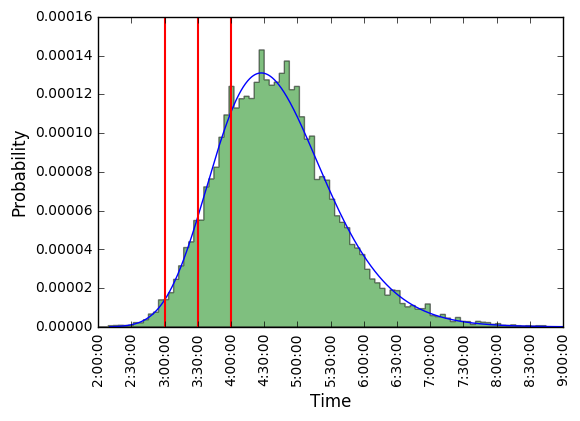

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.9        0.0        12.8       17.8       7.2       
year 2004 cdf:  4.39489278026e-05


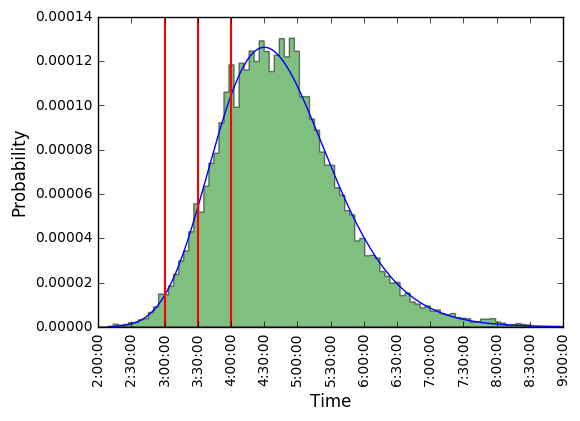

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
5.5        0.3        -9999.9    18.3       8.3       
year 2005 cdf:  8.79691567225e-05


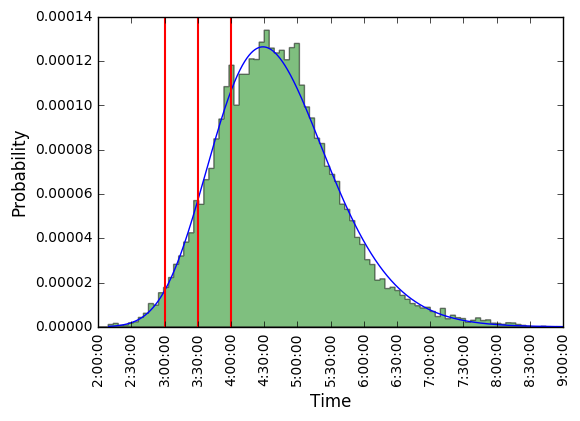

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
2.2        0.0        -9999.9    9.4        0.6       
year 2006 cdf:  0.0


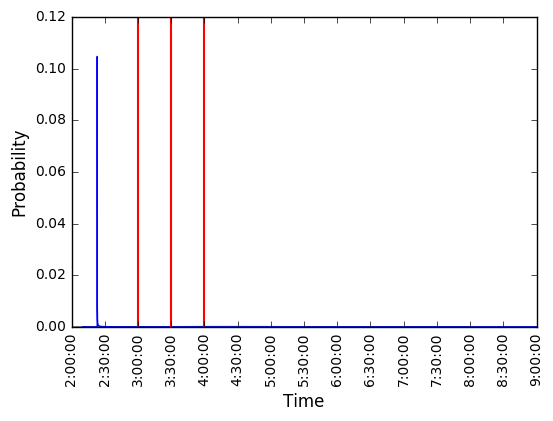

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.6        0.0        -9999.9    13.9       7.8       
year 2007 cdf:  0.000145485488162


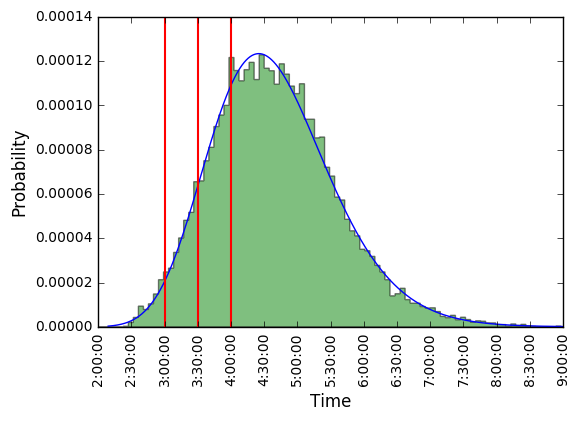

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.6        0.0        -9999.9    10.0       3.9       
year 2008 cdf:  0.000522772167421


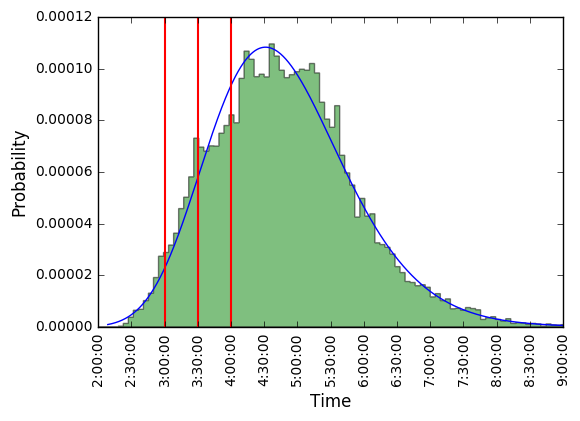

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
4.6        0.3        -9999.9    15.0       9.4       
year 2009 cdf:  0.000432971674075


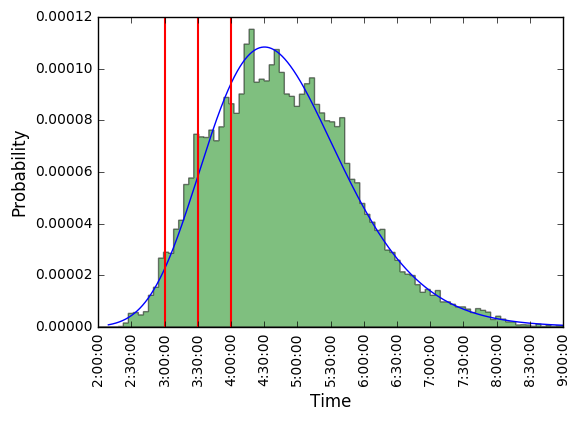

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
6.8        0.0        -9999.9    11.1       3.3       
year 2010 cdf:  0.00108036815512


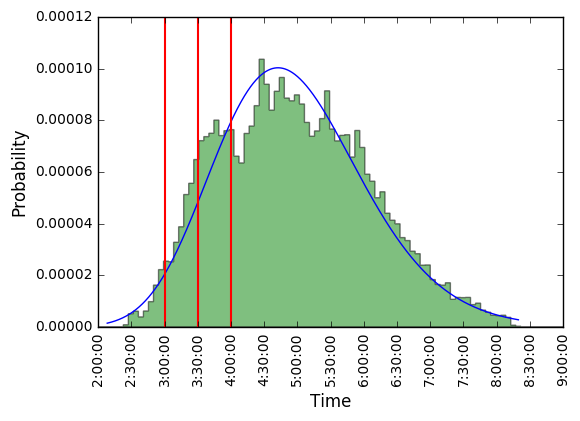

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
2.9        0.0        -9999.9    10.6       1.7       
year 2011 cdf:  0.0


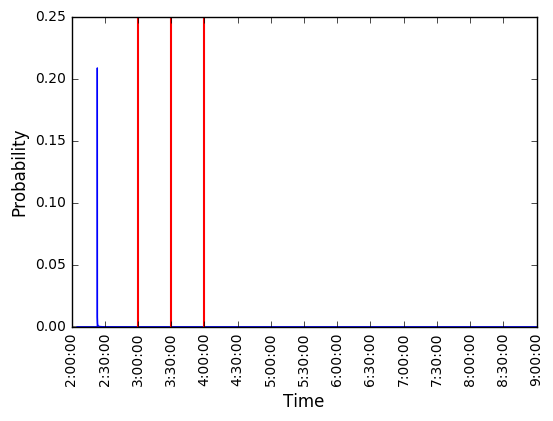

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
6.5        0.0        10.9       13.3       3.3       
year 2013 cdf:  3.59434067749e-09


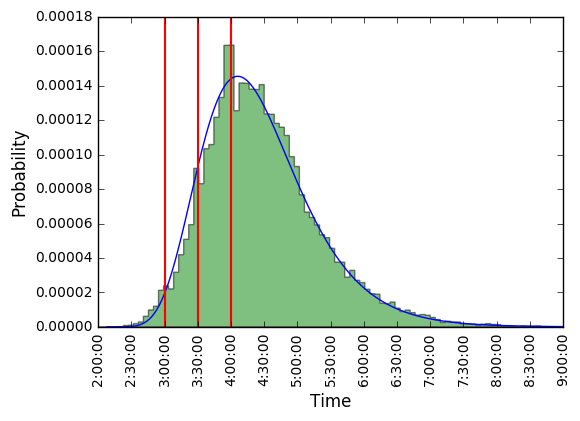

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
11.7       0.0        7.2        10.0       5.0       
year 2014 cdf:  0.0


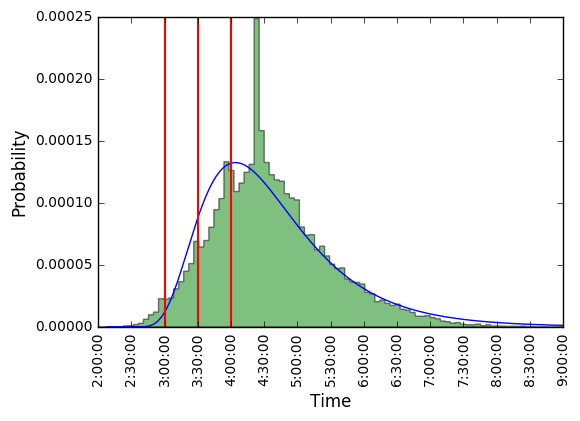

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
5.4        0.0        14.3       17.8       12.2      
year 2015 cdf:  2.63560938104e-05


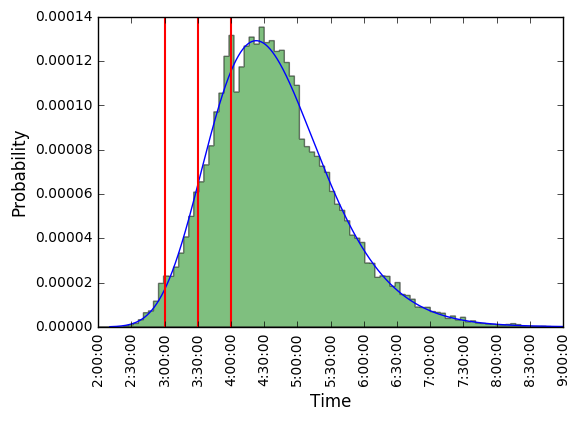

AWND    PRCP (mm)  TAVG (C)   TMAX (C)   TMIN (C)  
7.2        0.0        13.5       16.1       7.2       
year 2016 cdf:  0.0


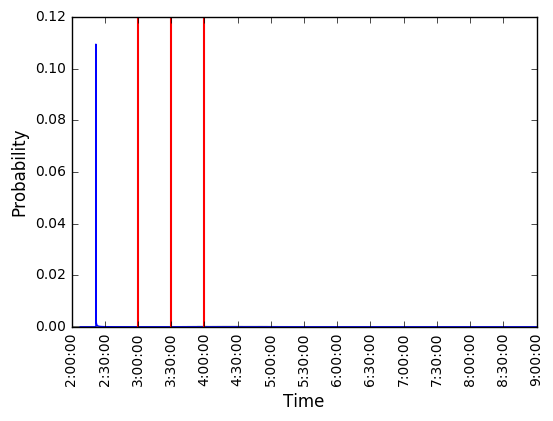

In [281]:
distributions = {}
years = list(range(1975, 2017))
years.remove(2012)
x_mult = 1
for y in years:
    distributions[y] = {'pdf':[], 'cdf':[], 'params':[]}
    for w in weather_data:
        yw, mw, sw = w[3].split('-')
        if str(y) == str(yw):
            try: 
                prt = [float(w[4]), float(w[5]), float(w[6]), float(w[7]), float(w[8])]
            except ValueError:
                prt = [float(e) if e != '' else float(-9999.9) for e in w[4:9]]
            times[y]['weather'].append(prt)
    try:
        # AWND PRCP TAVG TMAX TMIN WDFG
        # print the average temperature weather, for a day of the race.
        print('AWND'.ljust(7), 'PRCP (mm)'.ljust(10), 'TAVG (C)'.ljust(10), 'TMAX (C)'.ljust(10), 'TMIN (C)'.ljust(10))
        print('{:3.1f}'.format(prt[0]).ljust(10), 
              '{:3.1f}'.format(prt[1]).ljust(10), 
              '{:3.1f}'.format(prt[2]).ljust(10), 
              '{:3.1f}'.format(prt[3]).ljust(10), 
              '{:3.1f}'.format(prt[4]).ljust(10))
        
        data = times[y]['a'][20:-1]
        len_data = len(times[y]['a'])
        xmin, xmax = min(times[y]['a']), max(times[y]['a'])  
        lnspc = np.linspace(xmin, xmax, len_data)
        # fit a log-normal distribution
        ag, bg, cg = stats.lognorm.fit(data)

        # if fitting the log-normal fitting did not converge 
        pdf = stats.lognorm.pdf(lnspc, ag, bg, cg) 
        
        # retry the fit by specifying a parameter.
        if pdf[0] > 1:
            print('pdf did not converge, retrying with new parameter set')
            ag, bg, cg = stats.lognorm.fit(data, loc=0)
            pdf = stats.lognorm.pdf(lnspc, ag, bg, cg) 
        # create the pdf and cdf for the fitted log-normal distribution
        cdf = stats.lognorm.cdf(lnspc, ag, bg, cg)
        
        # save the distributions and parameters in a dictionary
        distributions[y]['cdf'].append(cdf)
        distributions[y]['pdf'].append(pdf)
        distributions[y]['params'].append([ag, bg, cg])
        print('year '+str(y)+' cdf: ', cdf[0])
        # plot the pdf to see how the PDF fits the data
        plt.plot(lnspc, pdf, label="log-normal")
        # plot the histogram of the data
        a, b, c = plt.hist(data, bins, alpha=0.5, label=str('all ')+str(y),
                              histtype='stepfilled', normed=True)
        #a1, b1, c1 = plt.hist(times[y]['m'], bins, alpha=0.5, label=str('males ')+str(y))
        #a2, b2, c2 = plt.hist(times[y]['f'], bins, alpha=0.5, label=str('females ')+str(y))
        
        # show important time breaks that people try and break
        # this the 4 hour break
        plt.axvline(4*3600, color='red', linewidth=1.5)
        # this is the three hour and thirty minute break
        plt.axvline(3*3600+30*60, color='red', linewidth=1.5)
        # this is the three hour break
        plt.axvline(3*3600, color='red', linewidth=1.5)
        mean_temp = np.mean(prt[3:5])
        x, y = np.min(b), np.max(a)
        plt.xlim(7200, 8*3600)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Probability', fontsize=12)
        plt.xticks(ticks_axes, tick_lab, rotation='vertical')
        plt.savefig(str(y)+'_lognormNYC.png', dpi=1000, bbox_inches='tight')
        plt.show()

    except KeyError:
        continue

## Save the newly fitted distribution values and parameters. 

In [ ]:
import pickle
pkl_cdfpdf = open('cdf_pdfBoston.pkl', 'wb')
pickle.dump(distributions, pkl_cdfpdf)
pkl_cdfpdf.close()

In [ ]:
pkl_times = open('dict_timeBoston.pkl', 'wb')
pickle.dump(times, pkl_times)
pkl_times.close()

## Load saved fitted distribution values and parameters

In [23]:
import pickle
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load in saved distributions and time dictionaries
pkl_dist_file = open('cdf_pdfNYC.pkl', 'rb')
NYC_dist = pickle.load(pkl_dist_file)

NYC_time_files = open('dict_timeNYC.pkl', 'rb')
NYC_times = pickle.load(NYC_time_files)

In [5]:
# look at years and the temperature at race day
years = list(range(2000, 2017))
years.remove(2012)
w_year = []
temp = []
dist_params = []
#a = []
#b = []
#c = []
mean = []
var = []
skew = []
kurt = []

for tw in years:
    try:
        temp.append(NYC_times[tw]['weather'][0][-1])
        w_year.append(tw)
        a = NYC_dist[tw]['params'][0][0]
        b = NYC_dist[tw]['params'][0][1]
        c = NYC_dist[tw]['params'][0][2]
        
        m, v, s, k = stats.lognorm.stats(a, b, c, moments='mvsk')
        
        mean.append(m)
        var.append(v)
        skew.append(s)
        kurt.append(k)
            
    except IndexError:
        pass

In [205]:
# make sure the distributions fit correctly
years = list(range(2000, 2017))
years.remove(2012)
for tw in years:
    print(stats.kstest(NYC_times[tw]['a'], 'lognorm', NYC_dist[tw]['params'][0])[-1])

5.12889940961e-09
1.57667870698e-09
2.01330174426e-11
0.000760311552791
0.0033844450685
0.000800216461712
2.75145227114e-08
0.00423753289447
3.72709571963e-09
4.3940587201e-20
6.085880111e-33
3.04102848147e-49
2.23217358248e-16
7.43702773623e-27
9.50197971256e-07
1.36344689075e-07


In [6]:
# print the parameers to see if any look weird
print('year'.ljust(10), 'temp.'.ljust(10), 'mean'.rjust(10), 
      'variance'.rjust(15), 'skew'.rjust(10), 'kurtiosis'.rjust(10))
print('_'*75)
for y, t, m, v, s, k in zip(years, temp, mean, var, skew, kurt):
    print('{:4.0f}'.format(y).ljust(10), 
          '{:4.1f}'.format(t).ljust(10), 
          '{:10.3f}'.format(m.tolist()).rjust(10), 
          '{:13.3f}'.format(v.tolist()).rjust(15), 
          '{:10.3f}'.format(s.tolist()).rjust(10), 
          '{:10.3f}'.format(k.tolist()).rjust(10))

year       temp.            mean        variance       skew  kurtiosis
___________________________________________________________________________
2000        6.7        16025.295     9580449.940      0.714      0.919
2001        8.3        16134.368     9511871.045      0.579      0.602
2002        2.8        16342.485     9784985.691      0.672      0.813
2003       13.3        16897.780    10108817.886      0.569      0.582
2004        7.2        17074.608    10925150.249      0.586      0.617
2005        8.3        16935.167    10699959.982      0.513      0.471
2006        0.6        16295.974    10332720.161      0.598      0.642
2007        7.8        16783.578    11361287.710      0.535      0.514
2008        3.9        17291.838    14806301.131      0.551      0.545
2009        9.4        17307.978    15253419.127      0.686      0.849
2010        3.3        17859.177    16788887.036      0.452      0.365
2011        1.7        18126.308    18779698.235      0.423      0.320
2

In [41]:
# filter marathons by temperature at race day
tmin = min(temp)
tmax = max(temp)

# pools all race rests that have a particular race day temp.
temp2data = {}

years = list(np.arange(2000, 2017))
years.remove(2012)
t_ran = np.linspace(tmin, tmax, 4)

for y in years:
    max_temp = NYC_times[y]['weather'][0][-2]
    
    y_data = NYC_times[y]['a']
    
    for n in np.arange(0, len(t_ran)-1):
        r_min, r_max = t_ran[n], t_ran[n+1]
        key_min, key_max = '{:4.2f}'.format(r_min), '{:4.2f}'.format(r_max)
        if max_temp >= r_min and max_temp <= r_max:
            #print(y, max_temp, 'range', n)
            try:
                # concatenate lists if they fall in the same range
                temp2data['-'.join([key_min, key_max])] = temp2data['-'.join([key_min, key_max])]+y_data
            except KeyError:
                
                temp2data['-'.join([key_min, key_max])] = y_data
                

## Conduct pairwise comparisons of distributions with increasing categories of temperature cut offs

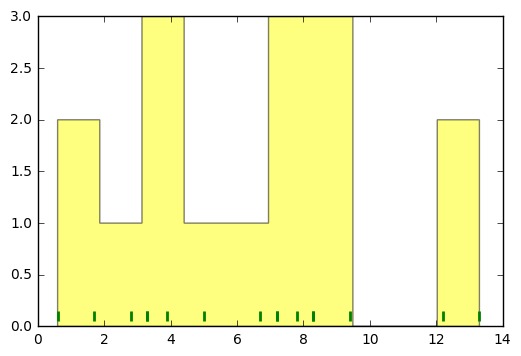

In [74]:
# check to see if temperature data is uniformally distributed.
plt.hist(temp, alpha=0.5, histtype='stepfilled', color='yellow')
plt.plot(temp, [0.1]*len(temp), '|', color='green', mew=2, markersize=7)
plt.show()

In [237]:
# filter marathons by temperature
tmin = min(temp)
tmax = max(temp)

# pools all race rests that have a particular race day temp.
temp2data = {}

#print(len(temp))

num_seps = 6

years = list(np.arange(2000, 2017))
years.remove(2012)

t_ran = np.linspace(tmin, tmax, num_seps)

for y in years:
    max_temp = NYC_times[y]['weather'][0][-1]
    
    y_data = NYC_times[y]['a']
    
    for n in np.arange(0, len(t_ran)-1):
        r_min, r_max = t_ran[n], t_ran[n+1]
        #print(r_min, r_max)
        key_min, key_max = '{:4.2f}'.format(r_min), '{:4.2f}'.format(r_max)
        if max_temp >= r_min and max_temp < r_max:
            
            #print(r_min, r_max)
            try:
                # concatenate lists if they fall in the same range
                temp2data['-'.join([key_min, key_max])] = temp2data['-'.join([key_min, key_max])]+y_data
            except KeyError:
                
                temp2data['-'.join([key_min, key_max])] = y_data
                

In [238]:
sorted(list(set(temp2data.keys())))

['0.60-3.14', '10.76-13.30', '3.14-5.68', '5.68-8.22', '8.22-10.76']

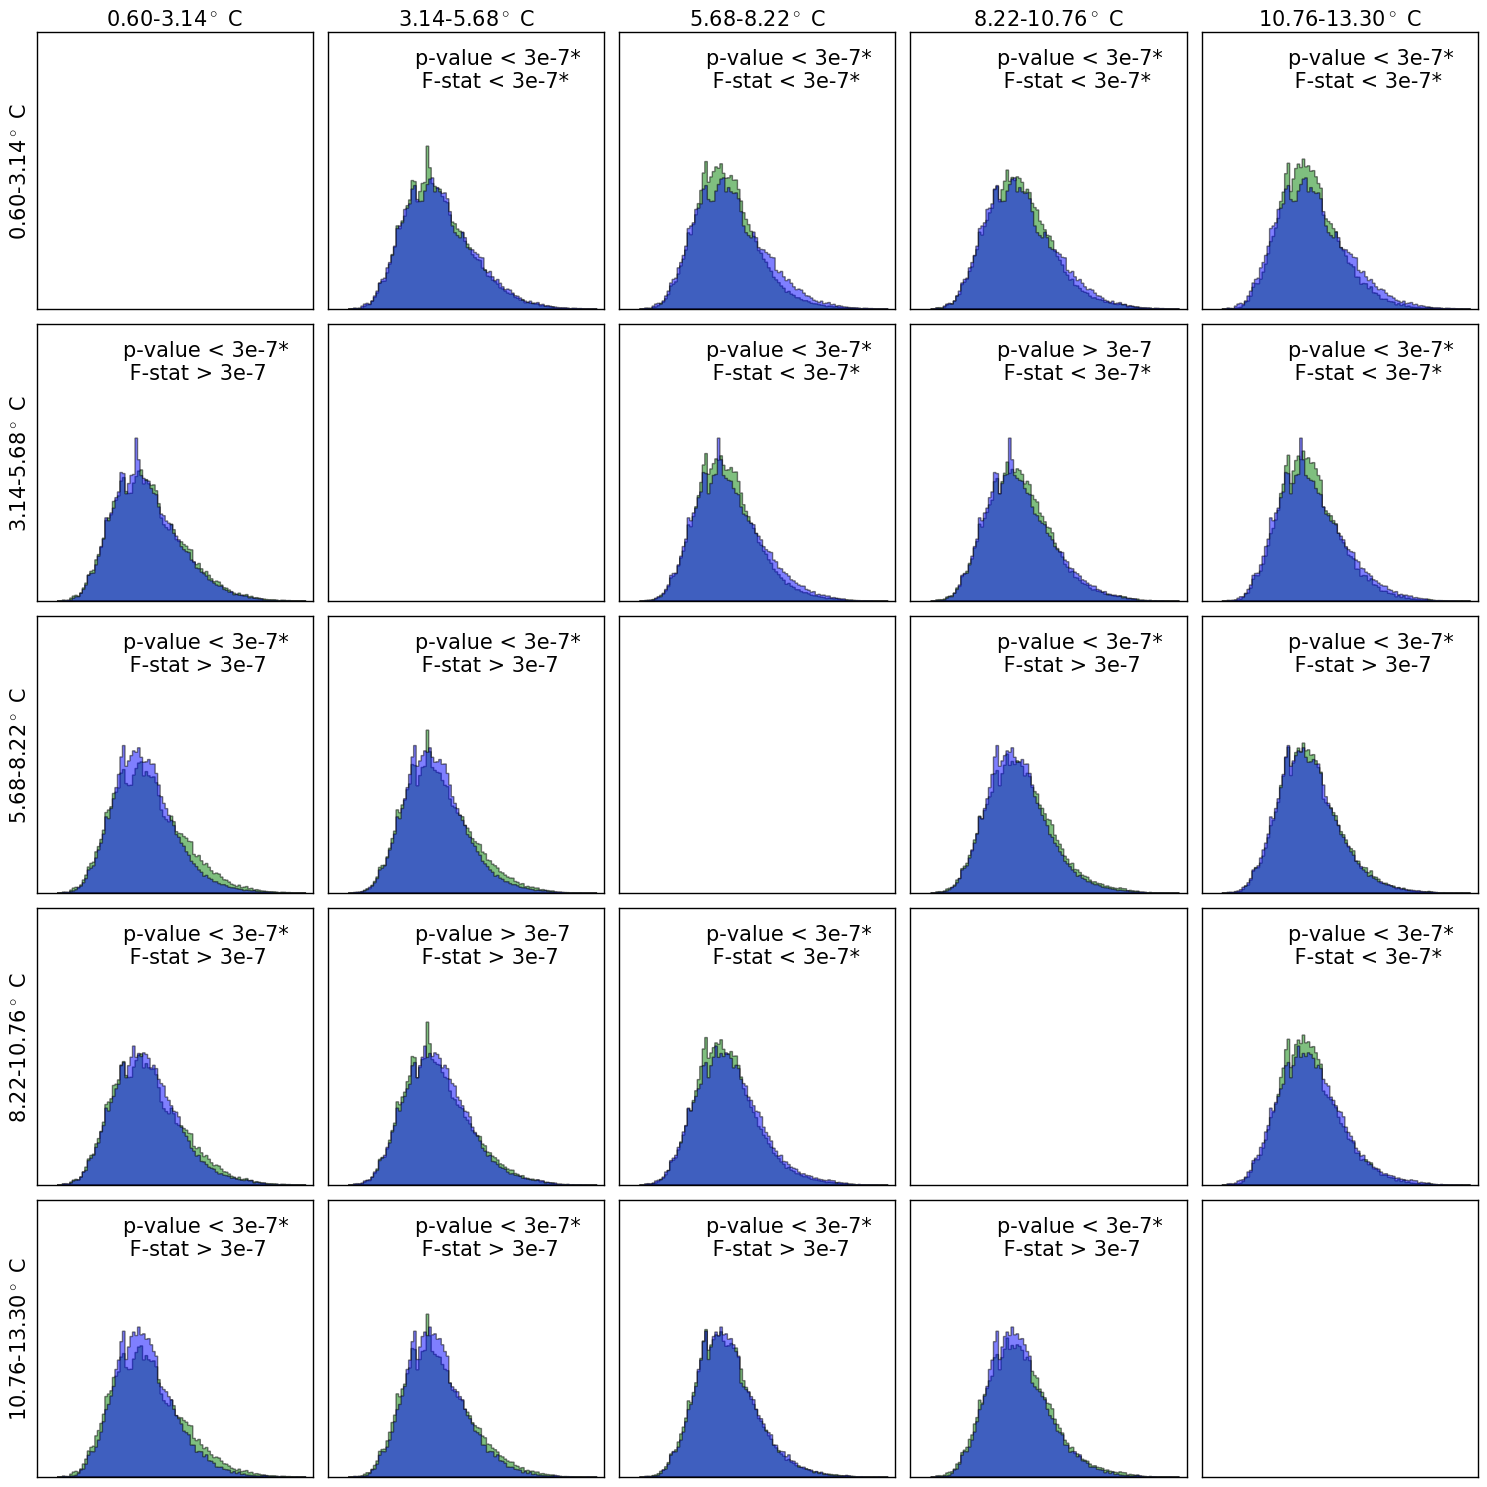

In [280]:
# do pairwise t-test
import itertools 
mara_combos = list(itertools.combinations(set(temp2data.keys()), 2))
bins = np.linspace(7200, 34200, 100)
temp_ranges = ['0.60-3.14', '3.14-5.68', '5.68-8.22', '8.22-10.76', '10.76-13.30']

temp2mean_pval = {}
temp2var_pval = {}
pval_numline = []
num_lin = []

fig, axes = plt.subplots(nrows=len(temp_ranges), ncols=len(temp_ranges), figsize=(15,15))
cn = 0


for col in temp_ranges:
    rn = 0
    for row in temp_ranges:
        temp_labelx = r'{}$^\circ$ C'.format(col)
        temp_labely = r'{}$^\circ$ C'.format(row)
        if col == row:
            axes[rn, cn].set_xticks([])
            axes[rn, cn].set_yticks([])
        else:
            #num_lin.append(np.mean([float(e) for e in combos[0].split('-')]))

            # because data are log-normal distributed
            # transform the data.
            x1 = np.log(temp2data[col])
            x2 = np.log(temp2data[row])

            all_stats = stats.ttest_ind(x1, x2)
            var1 = np.var(x1)
            var2 = np.var(x2)

            #F_stat = stats.f_oneway(x1, x2)
            F_stat = var1/var2

            alpha = 0.05

            df1 = len(temp2data[col]) - 1
            df2 = len(temp2data[row]) - 1

            pF_val = stats.f.cdf(F_stat, df1, df2)
            #pF_val = stats.kruskal(x1, x2)

            y_max = 0.4

            #print(pF_val)
            # the normal 0.05 sig level seems to be too weak so lets go for a 5 sigma!

            #print(all_stats)
            axes[rn, cn].hist(temp2data[col], bins, alpha=0.5, 
                              normed = True, histtype='stepfilled', 
                              color='green')
            axes[rn, cn].hist(temp2data[row], bins, alpha=0.5, 
                              normed = True, histtype='stepfilled', 
                              color='blue')
            axes[rn, cn].set_xticks([])
            axes[rn, cn].set_yticks([])
            #axes[rn, cn].axis('off')
            #plt.title(combos)
            if all_stats[-1] < 3e-7:
                pval = 'p-value < 3e-7* \n '
            else:
                pval = 'p-value > 3e-7 \n '
            if pF_val < 3e-7:
                f_val = 'F-stat < 3e-7*'
            else:
                f_val = 'F-stat > 3e-7'
                
            stats_vals = pval + f_val
            #stats_vals = 'p-val: {0:.2e}\n'.format(pval)+'f-stat: {0:.2e}'.format(f_val)
            

            axes[rn, cn].set_ylim(0, 0.00025)
            axes[rn, cn].text(4*3600, 0.0002,stats_vals, fontsize=15)
        
        if cn == 0:
            axes[rn, cn].set_ylabel(temp_labely, fontsize=15)
            
        if rn == 0:
            axes[rn, cn].set_title(temp_labelx, fontsize=15)

            #axes[rn, cn].text(25000, 0.00016, 'p-val: {0:.2e}'.format(all_stats[-1]))
            #axes[rn, cn].text(25000, 0.00013, 'f-stat: {0:.2e}'.format(pF_val))
            #plt.show()
        rn += 1
    cn += 1
plt.tight_layout()
plt.savefig('NYCPairWise.png', dpi=1000)
plt.show()
plt.close()


4.49300132413e-243
5.36759728088e-40
8.55853967854e-33
('10.12-13.30', '6.95-10.12') Ttest_indResult(statistic=-4.2525285739709568, pvalue=2.114392516500949e-05)


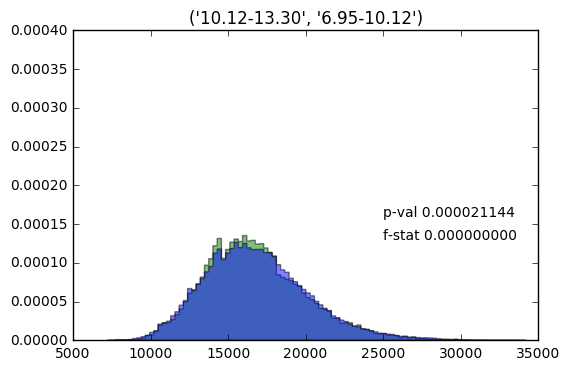

1.0
1.0
0.999454645309


In [213]:
# do pairwise t-test
import itertools 
mara_combos = list(itertools.combinations(set(temp2data.keys()), 2))
bins = np.linspace(7200, 34200, 100)

temp2mean_pval = {}
temp2var_pval = {}
pval_numline = []
num_lin = []

for combos in mara_combos:
    
    num_lin.append(np.mean([float(e) for e in combos[0].split('-')]))
    
    # because data are log-normal distributed
    # transform the data.
    x1 = np.log(temp2data[combos[0]])
    x2 = np.log(temp2data[combos[1]])
    
    all_stats = stats.ttest_ind(x1, x2)
    var1 = np.var(x1)
    var2 = np.var(x2)
    
    #F_stat = stats.f_oneway(x1, x2)
    F_stat = var1/var2
    
    alpha = 0.05
    
    df1 = len(temp2data[combos[0]]) - 1
    df2 = len(temp2data[combos[1]]) - 1
    
    pF_val = stats.f.cdf(F_stat, df1, df2)
    #pF_val = stats.kruskal(x1, x2)
    
    y_max = 0.4
    
    print(pF_val)
    # the normal 0.05 sig level seems to be too weak so lets go for a 5 sigma!
    if all_stats[-1] < 0.0000003:
        #f_val = combos[0].split('-')
        #print(combos, all_stats)
        #plt.hist(temp2data[combos[0]], bins, alpha=0.5, normed = True, histtype='stepfilled', color='green')
        #plt.hist(temp2data[combos[1]], bins, alpha=0.5, normed = True, histtype='stepfilled', color='blue')
        #plt.title(combos)
        #plt.ylim(0, 0.0002)
        #plt.text(25000, 0.00016, 'p-val {:5.4f}'.format(all_stats[-1]))
        #plt.text(25000, 0.00013, 'f-stat {:5.4f}'.format(pF_val))
        #plt.show()
        #plt.close()
        pass
    else:
        f_val = combos[0].split('-')
        print(combos, all_stats)
        plt.hist(temp2data[combos[0]], bins, alpha=0.5, normed = True, histtype='stepfilled', color='green')
        plt.hist(temp2data[combos[1]], bins, alpha=0.5, normed = True, histtype='stepfilled', color='blue')
        plt.title(combos)
        plt.ylim(0, 0.0004)
        plt.text(25000, 0.00016, 'p-val {:10.9f}'.format(all_stats[-1]))
        plt.text(25000, 0.00013, 'f-stat {:10.9f}'.format(pF_val))
        plt.show()
        plt.close()
        
        temp2mean_pval[combos] = all_stats[-1]
    if pF_val > 0.0000003:
        temp2var_pval[combos]= pF_val

In [174]:
temp2mean_pval

{('10.12-13.30', '6.95-10.12'): 2.114392516500949e-05}

## Plot distribution parameters against the temperature of the race. 

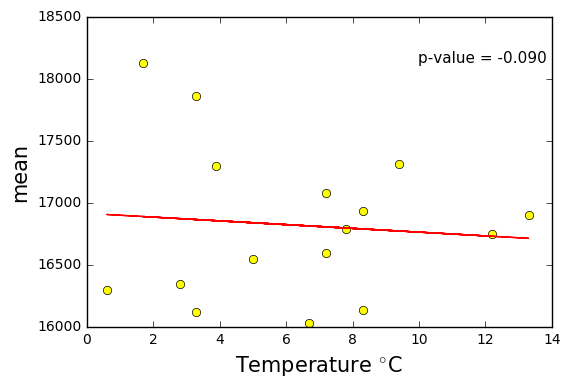

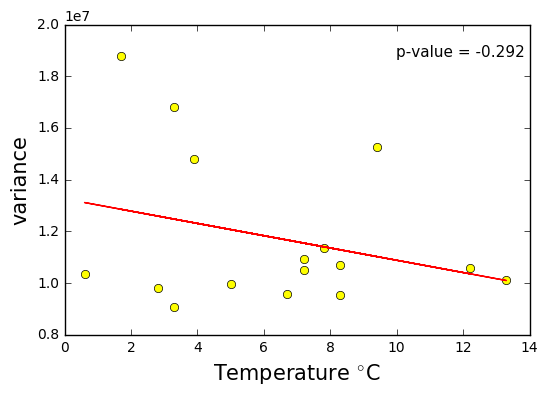

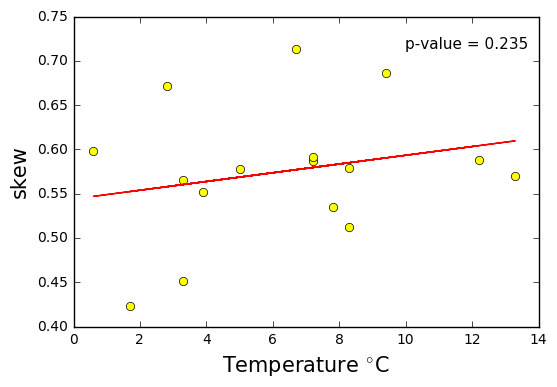

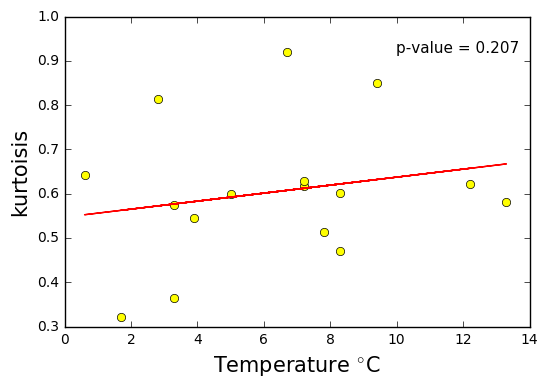

In [204]:
all_params = [mean, var, skew, kurt]

ylabs = ['mean', 'variance', 'skew', 'kurtoisis']

for labs, p in zip(ylabs, all_params):
    
    p_linreg = stats.linregress(temp, p)
    plt.plot(temp, p, 'o', color='yellow')
    y = np.add(np.multiply(temp, p_linreg[0]), p_linreg[1])
    
    p_val = '{:4.3f}'.format(p_linreg[2])
    p_val_y = max(p)
    p_val_x = max(temp)*0.75
    
    plt.text(p_val_x, p_val_y, 'p-value = '+p_val, fontsize=11)
    plt.plot(temp, y, 'red')
    plt.xlabel(r'Temperature $^{\circ}$C', fontsize=15)
    plt.ylabel(labs, fontsize=15)
    plt.savefig(labs+'vsTempNYC.png', dpi=1000, bbox_text='tight')
    plt.show()
    plt.close()

In [209]:
# save this data on mean, var, and skew to input into another jupyter notebook
NYC_ = open('NYCMVSK.pkl', 'wb')
MVSK = {}
for l, r in zip(ylabs, all_params):
    MVSK[l] = r
pickle.dump(MVSK, NYC_)    
NYC_.close()

In [211]:
# make a table of the ranges of mean variance and skew and kurtosis
print(' '.rjust(10), 'Min'.rjust(15), 'Max'.rjust(15), 'Mean'.rjust(15))
print('_'*60)
for l, r in zip(ylabs, all_params):
    print(l.rjust(10), 
          '{:10.3f}'.format(np.min(r)).rjust(15), 
          '{:15.3f}'.format(np.max(r)).rjust(15), 
          '{:15.3f}'.format(np.mean(r)).rjust(15))
    

                       Min             Max            Mean
____________________________________________________________
      mean       16025.295       18126.308       16816.820
  variance     9045557.987    18779698.235    11750313.538
      skew           0.423           0.714           0.575
 kurtoisis           0.320           0.919           0.604
